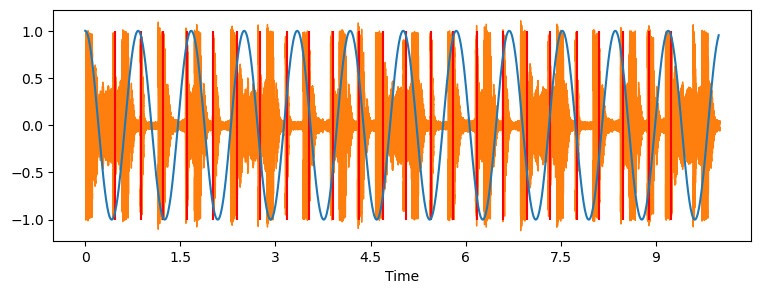

In [47]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import math


p = '/Users/minjunes/paradox/backend/src/club_havana.mp3'

ts, sr = librosa.load(p, sr=22050, duration=10)
tempo, beats = librosa.beat.beat_track(y=ts[0], sr=22050)
beat_t = librosa.frames_to_time(beats)
fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(9,3))

offset = 10/1000
time = [i*offset for i in range(0,1000)]

bpm = tempo
freq = (60/bpm)*2
y = 2*math.pi / freq
cosine = [math.cos(t*y) for t in time]

plt.vlines(beat_t, -1, 1, color='r')
plt.plot(time, cosine)
librosa.display.waveshow(ts[0], sr=22050, ax=ax)


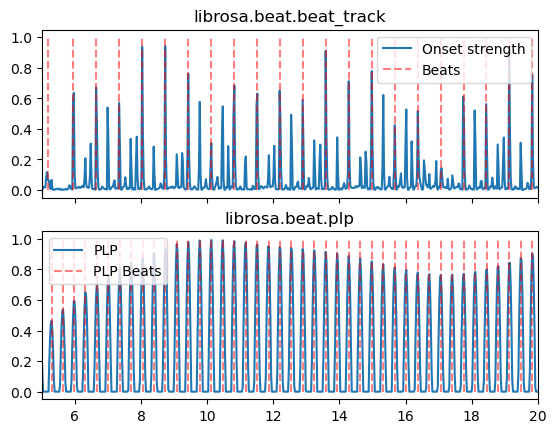

In [83]:

p = '/Users/minjunes/paradox/backend/src/Y2Mate.is - Too Much Cuteness - 100 Plushies of the Latent Space - Stable Diffusion Animation-cOC4hxFT3cM-64k-1654514688961.mp3'

ts, sr = librosa.load(p, sr=22050, duration=30)

onset_env = librosa.onset.onset_strength(y=ts, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)

tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
times = librosa.times_like(onset_env, sr=sr)
ax[0].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track', xlim=[5, 20])
ax[0].label_outer()
# Limit the plot to a 15-second window
#times = librosa.times_like(pulse, sr=sr)
ax[1].plot(times, librosa.util.normalize(pulse),
         label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp', xlim=[5, 20])
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())